In [3]:
import sys
print(sys.version)
import json
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt


3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


In [5]:
# TODO: Choose color palette https://seaborn.pydata.org/tutorial/color_palettes.html
kit_blue_1 = "#4664AA"
kit_blue_2 = "#7D92C3"
# TODO: Figure aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set(color_codes=True)

run = "anatomicalstructure_breadth"
res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
classes = list(res.index.values)

res

n_t     n_b      m_g    dens_g        k_t        k_b  \
AnatomicalStructure  7373.0  2458.0  73263.0  0.004043   9.936661  29.805940   
Artery                449.0   134.0   7152.0  0.118871  15.928731  53.373134   
Bone                  604.0   257.0   6023.0  0.038801   9.971854  23.435798   
Brain                 632.0   166.0   8171.0  0.077884  12.928797  49.222892   
Lymph                  82.0    86.0    953.0  0.135139  11.621951  11.081395   
Muscle                315.0    98.0   5237.0  0.169647  16.625397  53.438776   
Nerve                 394.0   131.0   5181.0  0.100380  13.149746  39.549618   
Vein                  257.0    45.0   3853.0  0.333160  14.992218  85.622222   

                            m_t    dens_t       k_t_om        c_t_om  ...  \
AnatomicalStructure  22109713.0  0.813549  5999.922117  26107.820081  ...   
Artery                  95308.0  0.947622   425.482143   4313.343750  ...   
Bone                   146690.0  0.805520   485.728477   2879.417219  ...   
Brain                  187960.0  0.942647   597.647059   4483.128776  ...   
Lymph                    2691.0  0.810298    69.000000    537.025641  ...   
Muscle                  47186.0  0.954120   299.593651   4008.292063  ...   
Nerve                   62112.0  0.802263   328.634921   2951.116402  ...   
Vein                    27248.0  0.828307   212.046693   2238.334630  ...   

                     max_dens_t  k_0_t    rel_rc_t  rc_b_dens  rc_b_ncomp  \
AnatomicalStructure    0.814211  113.0         NaN   0.000025    0.003596   
Artery                 0.951862   36.0   49.959901   0.015918    0.119430   
Bone                   0.881421   24.0   14.428916   0.001855    0.034930   
Brain                  0.951667   28.0   29.835499   0.007459    0.078251   
Lymph                  0.999383   17.0   63.573805   0.022669    0.136729   
Muscle                 0.954120   23.0   90.369829   0.030330    0.161021   
Nerve                  0.966288   24.0   46.541256   0.011133    0.093440   
Vein                   0.994650   24.0  164.138372   0.116783    0.318005   

                     rc_b_slcc  avg_dens_b  max_dens_b   k_0_b     rel_rc_b  
AnatomicalStructure   0.003546    0.000025    0.025290  6154.0          NaN  
Artery                0.110220    0.015918    0.343131   388.0   641.633203  
Bone                  0.034645    0.001855    0.092686   556.0    74.762881  
Brain                 0.072066    0.007459    0.152033   529.0   300.668726  
Lymph                 0.124964    0.022669    0.567787    81.0   913.754036  
Muscle                0.160563    0.030330    0.294551   295.0  1222.582382  
Nerve                 0.092991    0.011133    0.221844   350.0   448.760612  
Vein                  0.317651    0.116783    0.590909   242.0  4707.422561  

[8 rows x 28 columns]

90858 nodes with degree >= 1 and 4.0 disconnected nodes


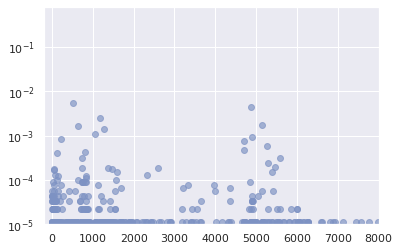

In [4]:
class1 = classes[0]
with open(f"out/{class1}/{class1}.t.k.json", "r") as input_file:
    dist = json.load(input_file)

nnodes = 0
for key, value in dist.items():
    nnodes += value

n_t = res.loc[class1, "n_t"]
ndiscnodes = n_t - nnodes

x = []
y = []
for key, value in dist.items():
    x.append(int(key))
    y.append(float(value / nnodes))
    
print(f"{nnodes} nodes with degree >= 1 and {ndiscnodes} disconnected nodes")
x.append(0)
y.append(float(ndiscnodes / nnodes))

# plt.xscale("log")
plt.xlim(-200, 8000)
plt.yscale("log")
plt.ylim(0.00001, 0.8)
plt.scatter(x, y, color=MAIN_COLOR_2+"aa")

6235 nodes with degree >= 1 and 0.0 disconnected nodes


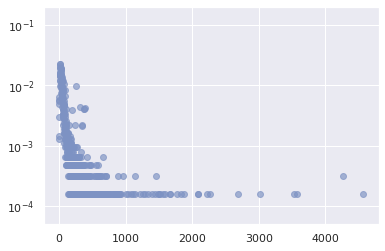

In [6]:
with open(f"out/{classes[0]}/{classes[0]}.b.k.json", "r") as input_file:
    dist = json.load(input_file)

nnodes = 0
for key, value in dist.items():
    nnodes += value

n_b = res.loc[classes[0], "n_b"]
ndiscnodes = n_b - nnodes

x = []
y = []
for key, value in dist.items():
    x.append(int(key))
    y.append(float(value / nnodes))
    
print(f"{nnodes} nodes with degree >= 1 and {ndiscnodes} disconnected nodes")
x.append(0)
y.append(float(ndiscnodes / nnodes))

# plt.xscale("log")
# plt.xlim(0.5, 50000)
plt.yscale("log")
plt.ylim(0.00005, 0.2)
plt.scatter(x, y, color=MAIN_COLOR_2+"aa")
plt.show()

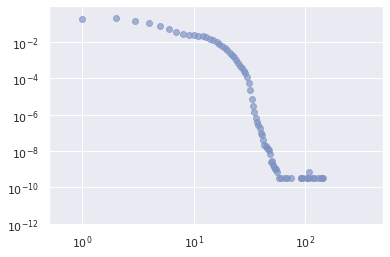

In [5]:
with open(f"out/{classes[0]}/{classes[0]}.t.w.json", "r") as input_file:
    dist = json.load(input_file)

nnodes = 0
for key, value in dist.items():
    if int(key) > 0:
        nnodes += value

x = []
y = []
for key, value in dist.items():
    if int(key) > 0:
        x.append(int(key))
        y.append(float(value / nnodes))

plt.xscale("log")
plt.xlim(0.5, 500)
plt.yscale("log")
plt.ylim(0.000000000001, 0.9)
plt.scatter(x, y, color=MAIN_COLOR_2+"aa")
plt.show()

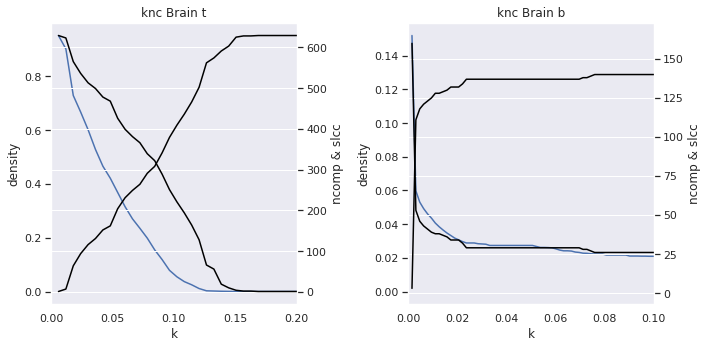

In [78]:
class1 = classes[3]

df_t = pd.read_csv(f"out/{class1}/{class1}.t.knc.csv", index_col=0)
df_b = pd.read_csv(f"out/{class1}/{class1}.b.knc.csv", index_col=0)

n_t = res.loc[class1, "n_t"]
n_b = res.loc[class1, "n_b"]
k_max_t = n_b
k_max_b = n_t
# w_max_t = 50


# knc_density = df["density"]
# knc_ncomponents = df["ncomponents"] # (n_t - df["ncomponents"]) / (n_t - 1)
# knc_slcc = df["slcc"] # (df["slcc"] - 1) / (n_t - 1)
# plt.xlim(0, w_max_t/k_max_t)
# plt.ylim(0, 1)
# plt.bar(df["k"]/k_max_t, knc_ncomponents, width=1/k_max_t, align="edge", color=MAIN_COLOR_1, edgecolor=MAIN_COLOR_2)

# plt.bar(df["k"]/k_max_t, knc_slcc, width=1/k_max_t, align="edge", color=MAIN_COLOR_1, edgecolor=MAIN_COLOR_2)
# ax = df["ncomponents"].plot()
# df["slcc"].plot(ax=ax)

df_t.index = df_t.index / k_max_t # Normalize k axis
df_b.index = df_b.index / k_max_b
# barwidth = 1 / k_max_t

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
try:
    df_t["density"].plot(ax=ax1, color="b", title=f"knc {class1} t") # .bar(width=barwidth, align="center") # kind="bar" # bar width not scaling with xlim
    df_t["ncomponents"].plot(ax=ax1, color="#000000", secondary_y=True)
    df_t["slcc"].plot(ax=ax1, color="#000000", secondary_y=True)
    ax1.right_ax.set_ylabel("ncomp & slcc")
except KeyError as e:
    print(classname, e)
ax1.set_xlim(0, 0.2)
ax1.set_ylabel("density")

try:
    df_b["density"].plot(ax=ax2, color="b", title=f"knc {class1} b") # .bar(width=barwidth, align="center") # kind="bar" # bar width not scaling with xlim
    df_b["ncomponents"].plot(ax=ax2, color="#000000", secondary_y=True)
    df_b["slcc"].plot(ax=ax2, color="#000000", secondary_y=True)
    ax2.right_ax.set_ylabel("ncomp & slcc")
except KeyError as e:
    print(classname, e)
ax2.set_xlim(0, 0.1)
ax2.set_ylabel("density")

fig.tight_layout() # plt.subplots_adjust(wspace=1)

WrittenWork 'ncomponents'
PeriodicalLiterature 'ncomponents'
AcademicJournal 'ncomponents'


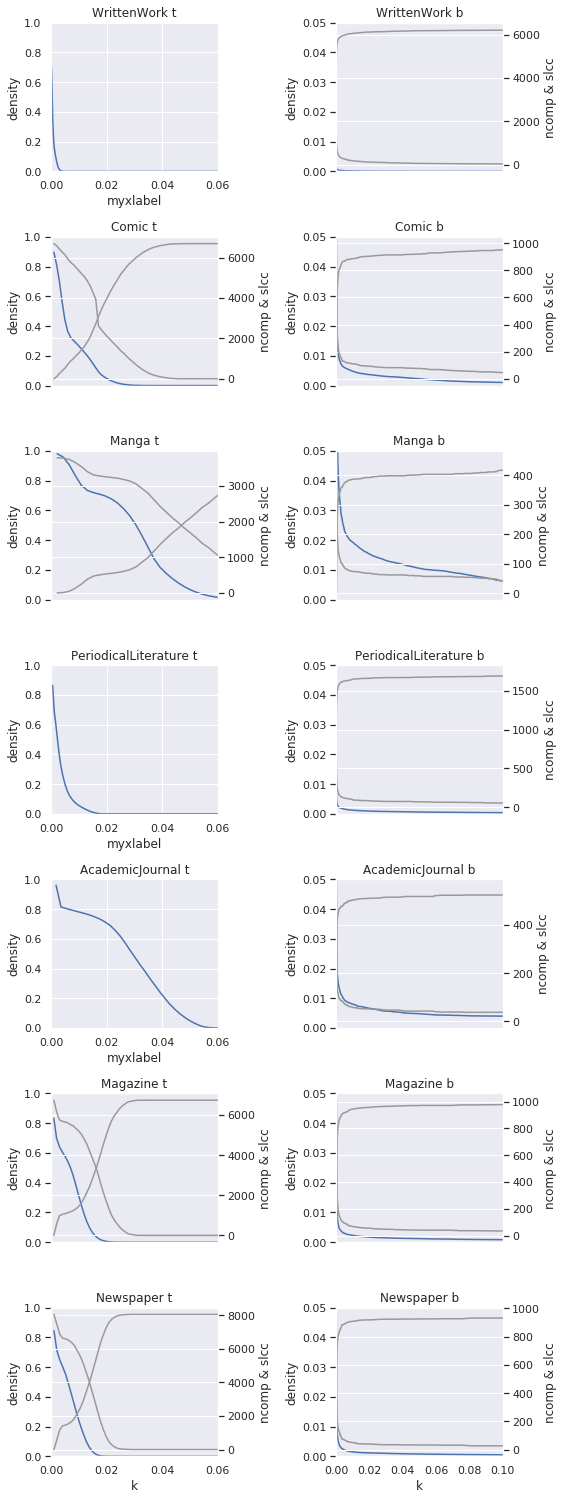

In [5]:
fig, axes = plt.subplots(len(classes), 2, figsize=(8, 3 * len(classes)))

for classname in classes:
    try:
        df_t = pd.read_csv(f"out/{classname}/{classname}.t.knc.csv", index_col=0)
        df_b = pd.read_csv(f"out/{classname}/{classname}.b.knc.csv", index_col=0)
    except FileNotFoundError as e:
        print(classname, e)

    n_t = res.loc[classname, "n_t"]
    n_b = res.loc[classname, "n_b"]

    df_t.index = df_t.index / n_b # Normalize k axis
    df_b.index = df_b.index / n_t

    axnr = classes.index(classname)
    df_t["density"].plot(x="k", ax=axes[axnr][0], color="b", title=f"{classname} t") # .bar(width=barwidth, align="center") # bar width not scaling with xlim
    axes[axnr][0].set_xlabel("myxlabel") # TODO: pandas issue, some xlables not showing
    try:
        df_t["ncomponents"].plot(ax=axes[axnr][0], color="#999999", secondary_y=True)
        df_t["slcc"].plot(ax=axes[axnr][0], color="#999999", secondary_y=True)
        axes[axnr][0].right_ax.set_ylabel("ncomp & slcc")
    except KeyError as e:
        print(classname, e)
    axes[axnr][0].set_xlim(0, 0.06)
    axes[axnr][0].set_ylim(0, 1)
    axes[axnr][0].set_ylabel("density")

    df_b["density"].plot(ax=axes[axnr][1], color="b", title=f"{classname} b") # .bar(width=barwidth, align="center") # bar width not scaling with xlim
    try:
        df_b["ncomponents"].plot(ax=axes[axnr][1], color="#999999", secondary_y=True)
        df_b["slcc"].plot(ax=axes[axnr][1], color="#999999", secondary_y=True)
        axes[axnr][1].right_ax.set_ylabel("ncomp & slcc")
    except KeyError as e:
        print(classname, e)
    axes[axnr][1].set_xlim(0, 0.1)
    axes[axnr][1].set_ylim(0, 0.05)
    axes[axnr][1].set_ylabel("density")

# plt.subplots_adjust(wspace=1, hspace=1)
# fig.tight_layout()
plt.tight_layout()
# plt.savefig("test.png",bbox_inches='tight')

<BarContainer object of 459 artists>

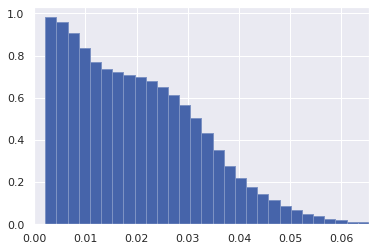

In [7]:
class1 = classes[2]
df = pd.read_csv(f"out/{class1}/{class1}.t.knc.csv")

n_t = res.loc[class1, "n_t"]
n_b = res.loc[class1, "n_b"]
k_max_t = n_b
w_max_t = 30

knc_density = df["density"]
# knc_ncomponents = (n_b - df["ncomponents"]) / (n_b - 1)
# knc_slcc = (df["slcc"] - 1) / (n_b -1)

plt.xlim(0, w_max_t/k_max_t)
# plt.ylim(0, 1)
plt.bar(df["k"]/k_max_t, knc_density, width=1/k_max_t, align="edge", color=MAIN_COLOR_1, edgecolor=MAIN_COLOR_2)


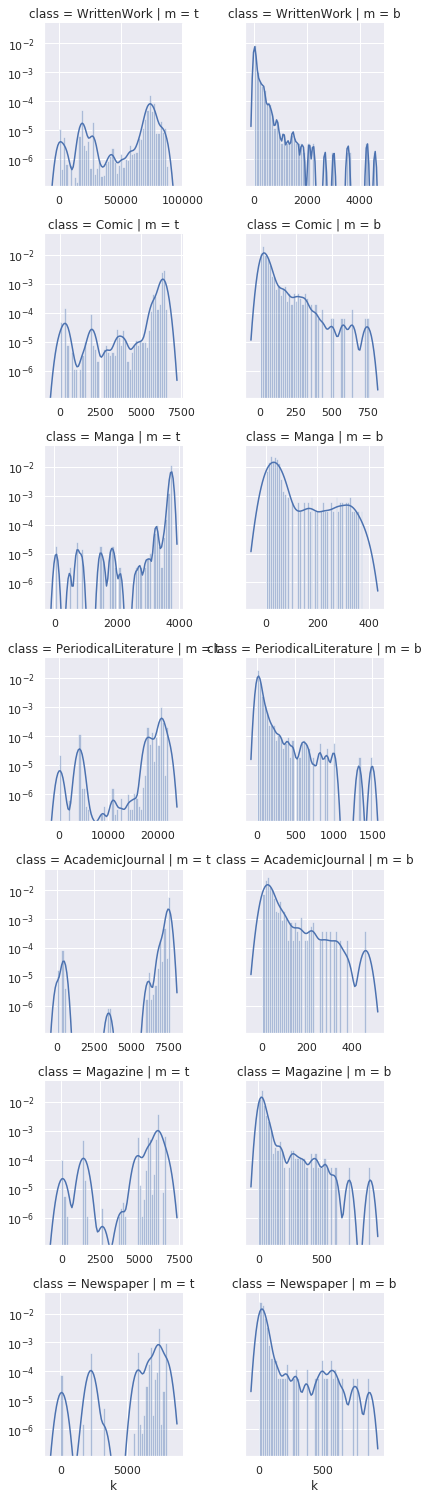

In [8]:
c = []
m = []
k = []
for classname in classes:
    with open(f"out/{classname}/{classname}.t.k.json", "r") as input_file:
        dist = json.load(input_file)
    for key, value in dist.items():
        for _ in range(0, value):
            c.append(classname)
            m.append("t")
#             k_max = res.
            k.append(int(key))
    with open(f"out/{classname}/{classname}.b.k.json", "r") as input_file:
        dist = json.load(input_file)
    for key, value in dist.items():
        for _ in range(0, value):
            c.append(classname)
            m.append("b")
            k.append(int(key))
#TODO: Normalize x axis
            
dct = {"class": c, "m": m, "k": k}
df = pd.DataFrame(dct)

fg = sns.FacetGrid(df, row="class", col="m", sharex=False)
fg.map(sns.distplot, "k")
fg.set(yscale="log")

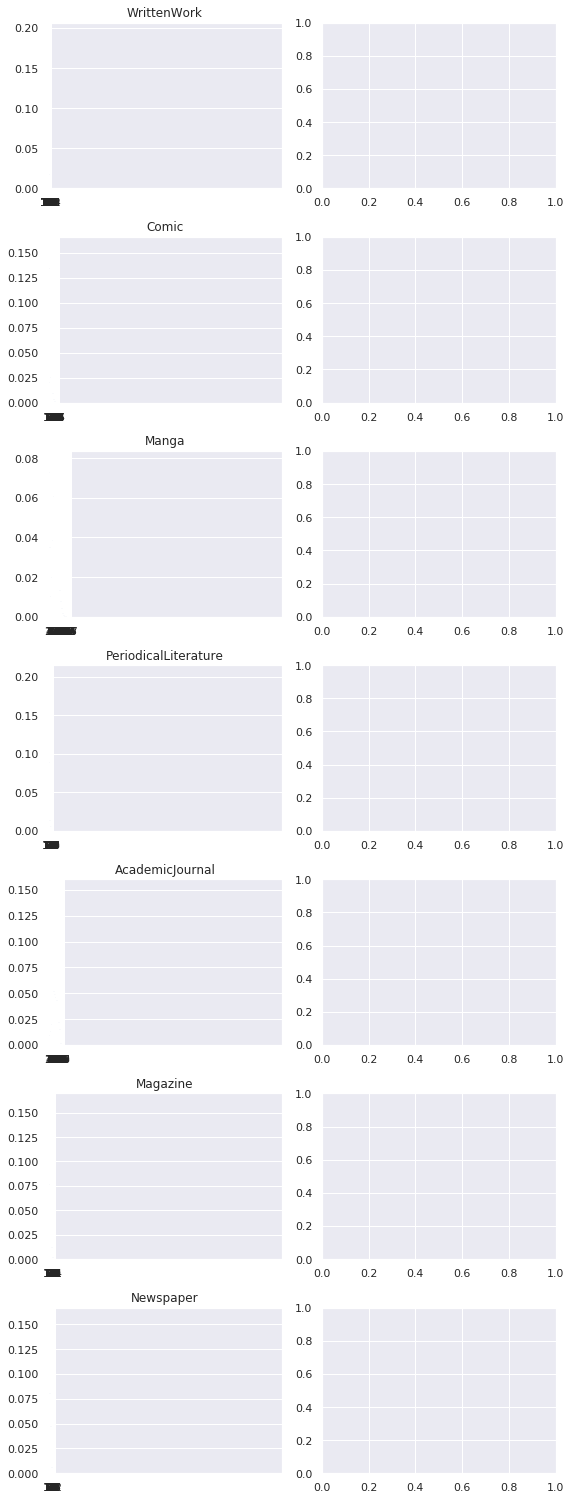

In [13]:
fig, axes = plt.subplots(len(classes), 2, figsize=(8, 3 * len(classes)))
for classname in classes:
    axnr = classes.index(classname)
    m_t = res.loc[classname, "m_t"]    
    w_max_t = res.loc[classname, "n_b"]
    w = []
    pw = []
    with open(f"out/{classname}/{classname}.t.w.json", "r") as input_file:
        dist = json.load(input_file)
    for key, value in dist.items():
        if int(key) > 0:
            w.append(key)
            pw.append(value / m_t)
    axes[axnr][0].bar(w, pw, align='center')
    axes[axnr][0].set_xlim(1, w_max_t) #axis(xmin=1,xmax=w_max_t) # TODO: Set xlim
    axes[axnr][0].set_title(classname)

# plt.tick_params(axis='x', which='minor', labelsize=0.5)
plt.tight_layout()

n_t 5, n_b 4, m 10


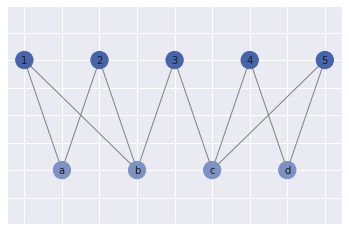

In [96]:
# Example graphs
# Visualize bipartite uniformity graph

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5], bipartite=0)
G.add_nodes_from(["a", "b", "c", "d"], bipartite=1)
# Full connected graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(1,"d"),
#                     (2,"a"),(2,"b"),(2,"c"),(2,"d"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"a"),(4,"b"),(4,"c"),(4,"d"),
#                     (5,"a"),(5,"b"),(5,"c"),(5,"d")])
# FiveFour graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),
#                     (2,"a"),(2,"b"),(2,"c"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"b"),(4,"c"),
#                     (5,"d")])
# Disconnected graph
# G.add_edges_from([(1,"a"),
#                     (2,"b"),
#                     (3,"c"),
#                     (4,"d")])
# 2 Cluster graph
G.add_edges_from([(1,"a"),(1,"b"),
                    (2,"a"),(2,"b"),
                    (3,"b"),(3,"c"),
                    (4,"c"),(4,"d"),
                    (5,"c"),(5,"d")])
top = [1, 2, 3, 4, 5] # top, bot = nx.bipartite.sets(G)
bot = ["a", "b", "c", "d"]
color_dict = {0: kit_blue_1, 1: kit_blue_2}
color_list = [color_dict[i[1]] for i in G.nodes.data("bipartite")]
print(f"n_t {len(top)}, n_b {len(bot)}, m {G.number_of_edges()}")

# bi_layout = nx.bipartite_layout(G, top, align="horizontal", aspect_ratio=20, scale=1)
# nx.draw_networkx(G, bi_layout, font_size=10, edge_color="grey", node_color=color_list)

bot_len = len(bot)
pos = dict()
pos.update((n, (i, 1.1)) for i, n in enumerate(top))
pos.update((n, (i + 0.5, 1)) for i, n in enumerate(bot))
nx.draw_networkx(G, pos=pos, font_size=10, edge_color="grey", node_color=color_list)

{(1, 2): Text(0.654508480212244, 0.4755283023511464, '3'),
 (1, 3): Text(0.09549145273252935, 0.2938926212887637, '3'),
 (1, 4): Text(0.09549151233717518, -0.2938926630120157, '2'),
 (2, 3): Text(-0.2500000670552266, 0.7694208997980517, '3'),
 (2, 4): Text(-0.2500000074505807, 0.1816356154972723, '2'),
 (3, 4): Text(-0.8090170349302954, -6.55651103964594e-08, '2'),
 (3, 5): Text(-0.24999999254941926, -0.18163562741820138, '1')}

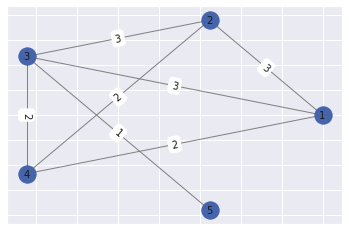

In [121]:
# Example graphs
# Visualize deterioration of onemode graphs

G = nx.Graph()
# Top mode
# FiveFour graph
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_weighted_edges_from([(1,2,3),(1,3,3),(1,4,2),
                            (2,3,3),(2,4,2),
                            (3,4,2),(3,5,1)])

nx.draw_networkx(G, pos=nx.circular_layout(G, scale=1), font_size=10, edge_color="grey", node_color=kit_blue_1)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G, scale=1), edge_labels=labels, font_size=10)


# Full connected graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(1,"d"),
#                     (2,"a"),(2,"b"),(2,"c"),(2,"d"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"a"),(4,"b"),(4,"c"),(4,"d"),
#                     (5,"a"),(5,"b"),(5,"c"),(5,"d")])

# Disconnected graph
# G.add_edges_from([(1,"a"),
#                     (2,"b"),
#                     (3,"c"),
#                     (4,"d")])
# 2 Cluster graph
# G.add_edges_from([(1,"a"),(1,"b"),
#                     (2,"a"),(2,"b"),
#                     (3,"b"),(3,"c"),
#                     (4,"c"),(4,"d"),
#                     (5,"c"),(5,"d")])

# G.add_nodes_from(["a", "b", "c", "d"])